In [4]:
import numpy as np 
from matplotlib import pyplot as plt

/home/mahmoud/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
from colorama import Style, Fore, Back
blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
grn_bck = Back.GREEN
res = Style.RESET_ALL

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Exercise 7-1.
> In this exercise, you will transform the covariance matrix into a correlation matrix. The procedure involves dividing each matrix element (that is, the covariance between each pair of variables) by the product of the variances of those two variables. This is implemented by pre- and postmultiplying the covariance matrix by a diagonal matrix containing inverted standard deviations of each variable (standard deviation is the square root of variance). The standard deviations are inverted because we need to divide by the variances although we will multiply matrices. The reason for pre- and postmultiplying by standard deviations is the special property of pre- and postmultiplying by a diagonal matrix, which was explained in Exercise 5-11. Equation 7-1 shows the formula. Exercise 7-1. Correlation from covariance R = SCS C is the covariance matrix, and S is a diagonal matrix of reciprocated standard deviations per variable (that is, the ith diagonal is 1/σi where σi is the standard deviation of variable i). Your goal in this exercise is to compute the correlation matrix from the covariance matrix, by translating Equation 7-1 into Python code. You can then reproduce Figure 7-6.

In [38]:
def cov_to_corr(cov : np.ndarray) -> np.ndarray:
    d = np.diag(cov)
    std = np.sqrt(d)
    s = np.diag(1/std.flatten())
    corr = s @ cov @ s
    return corr

# 10d covariance matrix
np.random.seed(0)
cov = np.random.randn(100, 100)
cov = cov @ cov.T

corr = cov_to_corr(cov)

# make two plots 
fig = make_subplots(rows=1, cols=2, subplot_titles=['Covariance matrix', 'Correlation matrix'])
fig.add_trace(go.Heatmap(z=cov, colorscale='Viridis', zmin=-1, zmax=1), row=1, col=1)
fig.add_trace(go.Heatmap(z=corr, colorscale='Viridis', zmin=-1, zmax=1), row=1, col=2)
fig.update_layout(title_text='Covariance and Correlation matrices')
fig.show()


# Exercise 7-2. 
> NumPy has a function np.corrcoef() that returns a correlation matrix, given an input data matrix. Use this function to reproduce the correlation matrix you created in the previous exercise. Show both matrices, and their difference, in a figure like Figure 7-7 to confirm that they are the same.

In [37]:
np_corr = np.corrcoef(cov)

fig = make_subplots(rows=1, cols=2, subplot_titles=['Correlation matrix', 'Numpy Correlation matrix'])
fig.add_trace(go.Heatmap(z=corr, colorscale='Viridis', zmin=-1, zmax=1), row=1, col=1)
fig.add_trace(go.Heatmap(z=np_corr, colorscale='Viridis', zmin=-1, zmax=1), row=1, col=2)
fig.update_layout(title_text='Correlation matrices')
fig.show()


# Exercise 7-3.
> The goal of this exercise is to show points in a circle before and after applying a transformation, similar to how I showed the line before and after rotation in Figure 7-2. Use the following transformation matrix and then create a graph that looks like Figure 7-8:

/tmp/ipykernel_6884/4277197981.py:10: RuntimeWarning: invalid value encountered in sqrt
  y = np.sqrt(1 - np.power(x, 2))


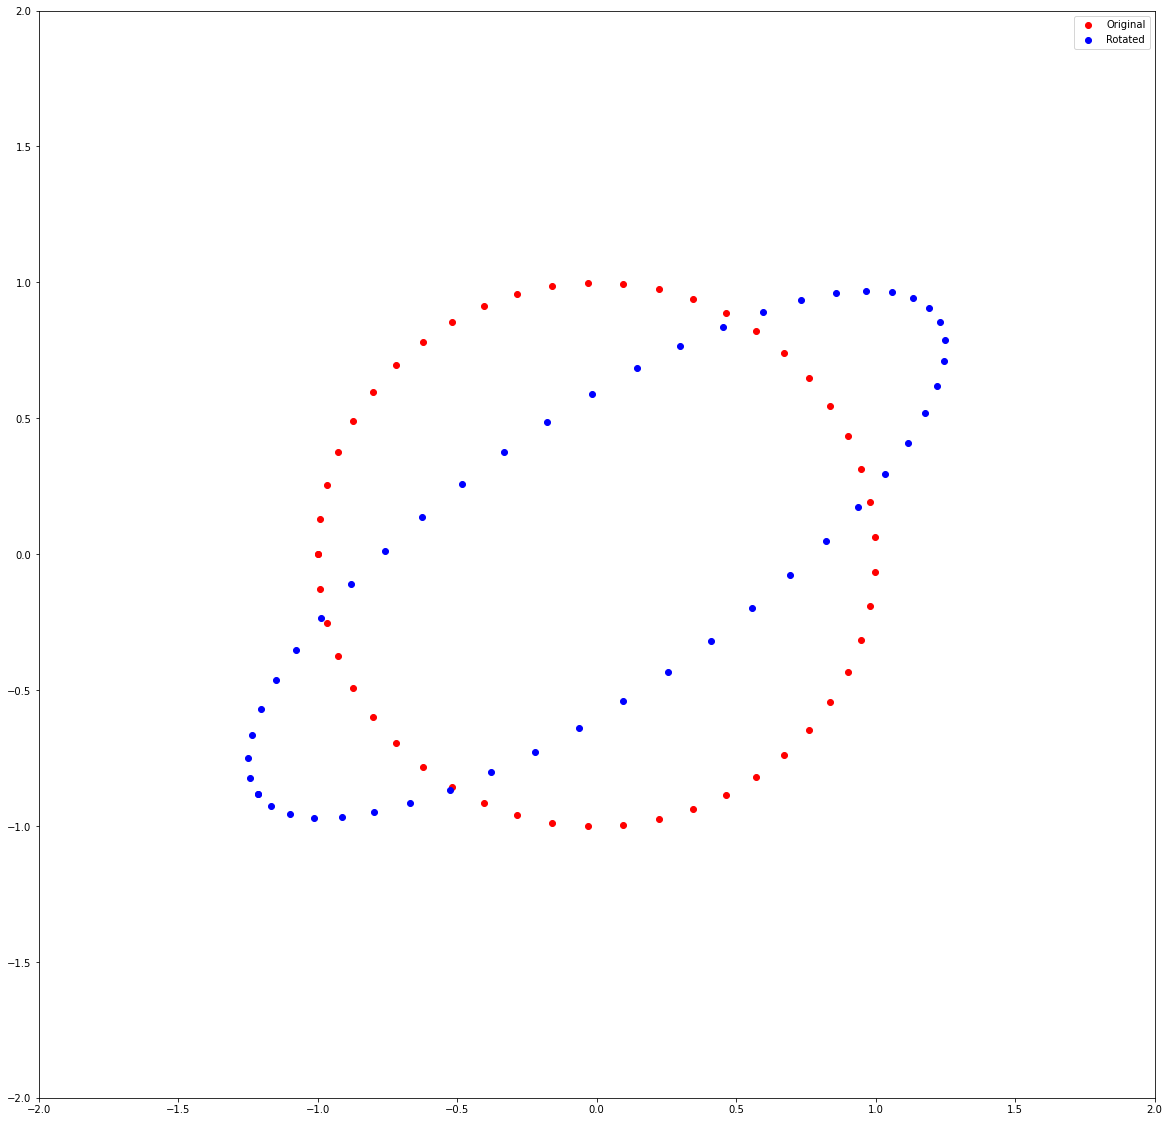

In [27]:
theta = np.pi / 5

rot = np.array([[1.5*np.cos(theta), -0.5*np.sin(theta)], 
                [1.5*np.sin(theta), 0.5*np.cos(theta)]])
# rot = np.array([[1, -0.5], 
#                 [0, 0.5]])

x = np.linspace(-np.pi, np.pi, 50)

y = np.sqrt(1 - np.power(x, 2))

points = np.vstack([np.cos(x), np.sin(x)])

rotated = rot @ points

plt.figure(figsize=(20, 20))
plt.scatter(points[0], points[1], c='r', label='Original')
plt.scatter(rotated[0], rotated[1], c='b', label='Rotated')

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.legend()
plt.show()

# Exercise 7-4.
> Now for another movie. I call this one The Coiling DNA. Figure 7-9 shows one frame of the movie. The procedure is the same as for The Wobbly Circle—set up a figure, create a Python function that applies a transformation matrix to a matrix of coordinates, and tell matplotlib to create an animation using that function. Use the following transformation matrix:

$$T =  \begin{bmatrix}
                        1-\phi/3 & 0 \\
                        0 & \phi \\
        \end{bmatrix}
, 
-1 \le \phi \le 1        
$$



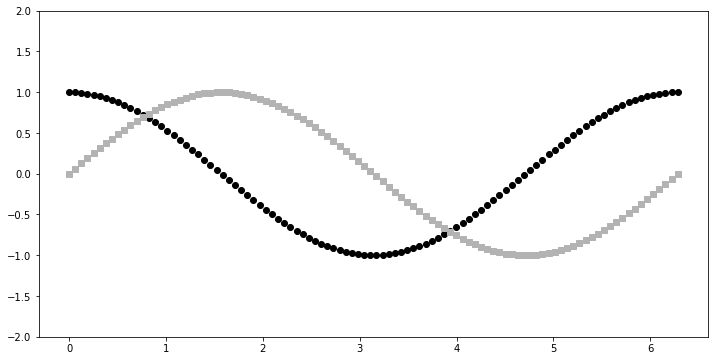

In [33]:
from matplotlib import animation
def aframe(ph):

  # create the transformation matrix
  T = np.array([ [  1-ph/3,0 ],
                 [  0,ph   ] ])

  # apply the transformation to the points using matrix multiplication
  P1 = T@Y1
  P2 = T@Y2

  # update the lower/upper lines
  plth1.set_xdata(P1[0,:])
  plth1.set_ydata(P1[1,:])

  plth2.set_xdata(P2[0,:])
  plth2.set_ydata(P2[1,:])

  # export the plot handles
  return (plth1,plth2)

# define XY points
th = np.linspace(0,2*np.pi,100) # th = theta (angles)
Y1 = np.vstack((th,np.cos(th)))
Y2 = np.vstack((th,np.sin(th)))


# setup figure
fig,ax = plt.subplots(1,figsize=(12,6))

plth1, = ax.plot(Y1[0,:],Y1[1,:],'ko')
plth2, = ax.plot(Y2[0,:],Y2[1,:],'s',color=[.7,.7,.7])
ax.set_ylim([-2,2])


# define phases and run animation
phi = 1-np.linspace(-1,1-1/40,40)**2
animation.FuncAnimation(fig, aframe, phi, interval=50, repeat=True)


plt.show()

# Exercise 7-5.
> Smooth the 3D bathtub picture (if you need a hint, check the footnote4). The output of the convolve2d function has a data type float64 (you can see this yourself by typing variableName.dtype). However, plt.imshow will give a warning about clipping numerical values, and the picture won’t render properly. Therefore, you’ll need to convert the result of convolution to uint8.

In [3]:
import cv2

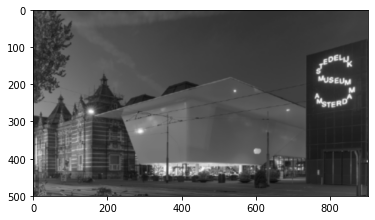

In [4]:
def apply_kernel(img : np.ndarray, kernel : np.ndarray) -> np.ndarray:
    k_width, k_height = kernel.shape[:2]
    for i in range(k_height//2, img.shape[0] - k_height//2):
        for j in range(k_width//2, img.shape[1] - k_width//2):
            img[i, j] = np.sum(img[i-k_height//2:i+(k_height+1)//2, j-k_width//2:j+(k_width+1)//2] * kernel, axis=(0, 1))
    return img

img = cv2.imread('bathtub.png')[:, :, ::-1]
# kernel = np.ones((3, 3)) / 9
# kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
kernel = np.array([[1, 2, 1], 
                   [2, 4, 2], 
                   [1, 2, 1]])

kernel = np.stack([kernel] * 3, axis=-1)
kernel = kernel / np.sum(kernel, axis=(0, 1))

img = apply_kernel(img, kernel)

plt.imshow(img)
plt.show()


# Exercise 7-6.
> You don’t need to use the same kernel for each color channel. Change the width parameter of the Gaussian for each channel according to the values shown in Figure 7-10. The effect on the image is subtle, but the different blurs of the different colors give it a bit of a 3D look, as if you are looking at a red-blue anaglyph without the glasses.

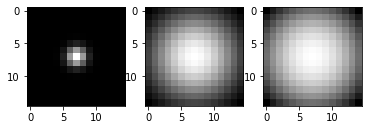

In [5]:
def gaussuan_kernel (size, sigma=1):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-size//2)**2 + (y-size//2)**2)/(2*sigma**2)), (size, size))
    return kernel / np.sum(kernel)

red_kernel = gaussuan_kernel(15, 1)
green_kernel = gaussuan_kernel(15, 5)
blue_kernel = gaussuan_kernel(15, 10)

kernel = np.stack([red_kernel, green_kernel, blue_kernel], axis=-1)

plt.subplot(1, 3, 1)
plt.imshow(red_kernel, cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(green_kernel, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(blue_kernel, cmap='gray')

plt.show()

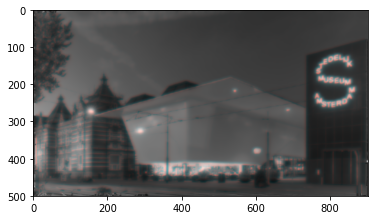

In [85]:
img = cv2.imread('bathtub.png')[:, :, ::-1]
img = apply_kernel(img, kernel)

plt.imshow(img)
plt.show()


# Exercise 7-7.
> Technically, image smoothing is feature extraction, because it involves extracting the smooth features of the signal while dampening the sharp features. Here we will change the filter kernels to solve other image feature detection problems: identifying horizontal and vertical lines. The two kernels are shown in Figure 7-11, as are their effects on the image. You can handcraft the two kernels based on their visual appearance; they are 3 × 3 and comprise only the numbers −1, 0, and +1. Convolve those kernels with the 2D grayscale picture to create the feature maps shown in Figure 7-11.

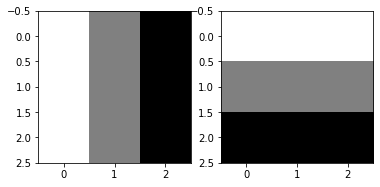

In [9]:
vertical_kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
vertical_kernel = np.stack([vertical_kernel] * 3, axis=-1) / 3

horizontal_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
horizontal_kernel = np.stack([horizontal_kernel] * 3, axis=-1) / 3

plt.subplot(1, 2, 1)
plt.imshow(vertical_kernel[:, :, 0], cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(horizontal_kernel[:, :, 0], cmap='gray')

plt.show()


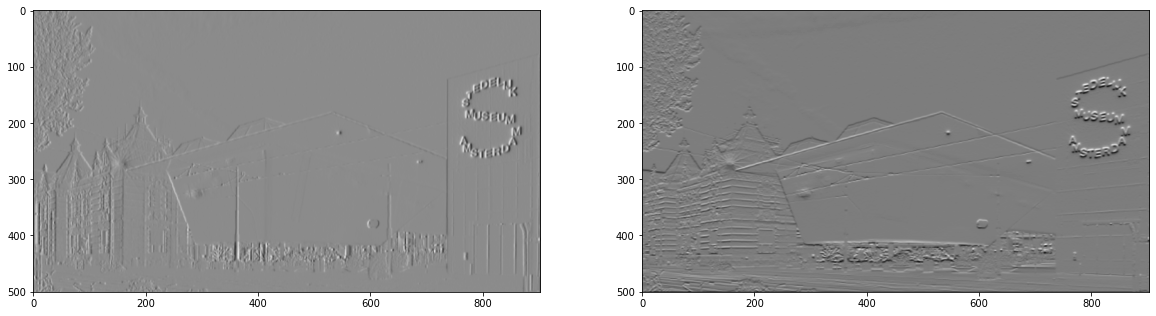

In [13]:
from scipy.signal import convolve2d


plt.figure(figsize=(20, 20))

img = cv2.imread('bathtub.png')[:, :, 0]
_img = convolve2d(img, vertical_kernel[:, :, 0], mode='same')


plt.subplot(1, 2, 1)
plt.imshow(_img, cmap='gray')

_img = convolve2d(img, horizontal_kernel[:, :, 0], mode='same')

plt.subplot(1, 2, 2)
plt.imshow(_img, cmap='gray')

plt.show ()